In [12]:
import random as rnd
import matplotlib.pyplot as plt
from math import sqrt, pi, cos, sin

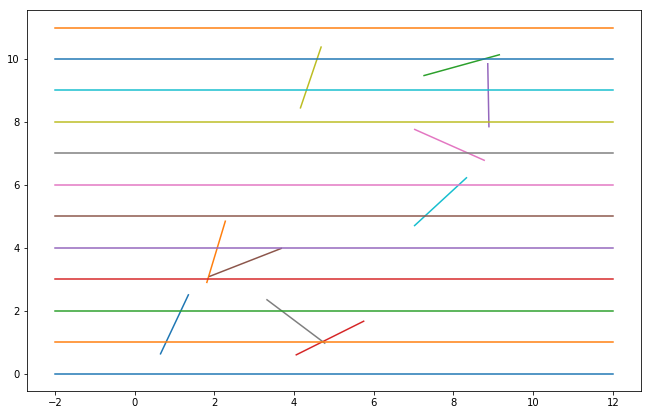

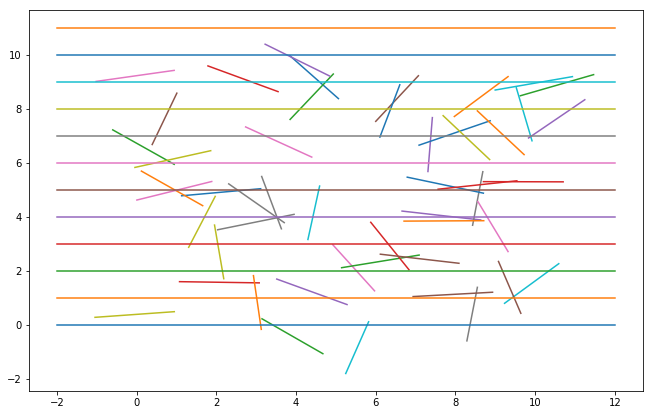

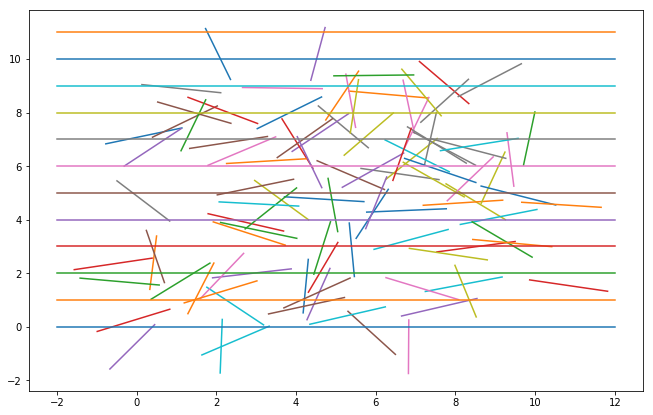

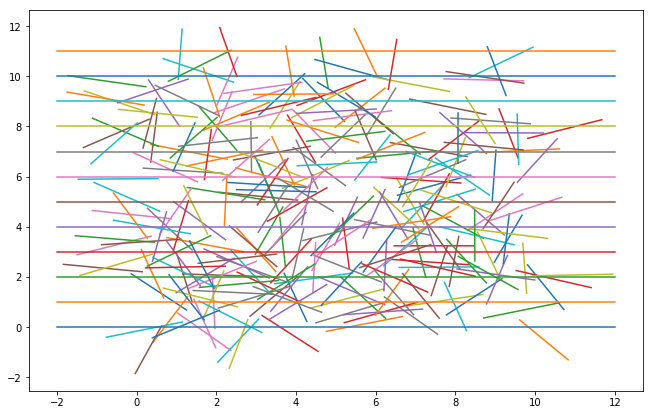

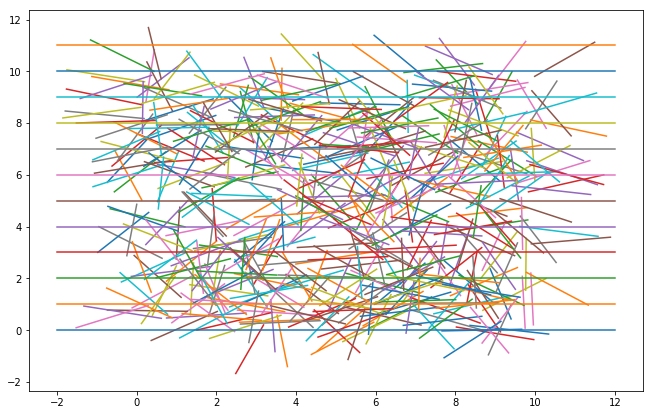

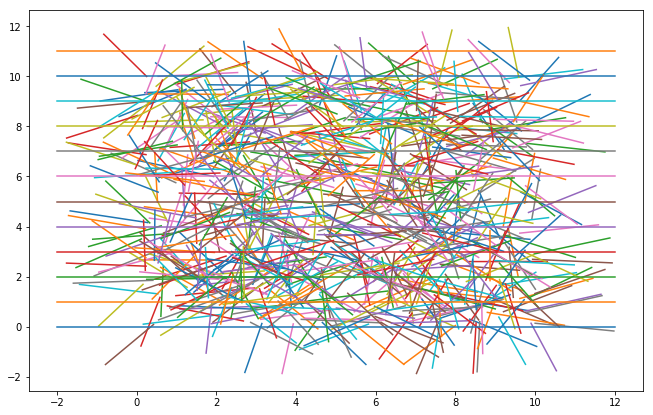

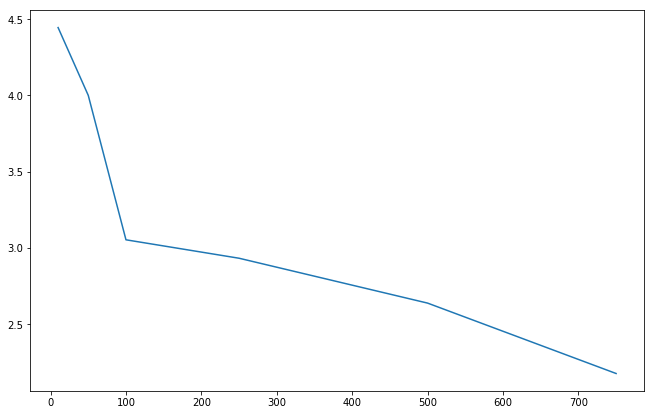

[4.444444444444445, 4.0, 3.0534351145038165, 2.9325513196480935, 2.638522427440633, 2.177068214804064]
3.2076702534735086


In [13]:
##################  Buffon's needle ############################################

r = 1
numLines = 12
lines = [i * r for i in range(numLines)]
L = 2

def dist(x1, y1, x2, y2):
    return sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


def drawLines():
    for line in lines:
        plt.plot([-L, numLines * r], [line, line])


def needle():
    x1, y1 = rnd.random() * (numLines * r - L) , rnd.random() * (numLines * r - L)
    teta = rnd.random() * 2 * pi
    x2 = x1 + L * cos(teta)
    y2 = y1 + L * sin(teta)
    return x1, y1, x2, y2


def throw(x1, y1, x2, y2):
    plt.plot([x1, x2], [y1, y2])


def isIntersected(y1, y2):
    p1 = min(y1, y2)
    p2 = max(y1, y2)
    for i in range(len(lines)):
        if(lines[i] >= p1) and (lines[i] <= p2):
            return True
    return False


intersections = 0
throws = [10, 50, 100, 250, 500, 750]
numPis = []


for num in throws:
    plt.figure(figsize=(11,7))
    
    for i in range(num):
        x1, y1, x2, y2 = needle()
        throw(x1, y1, x2, y2)
        if(isIntersected(y1, y2)): intersections +=1
    drawLines()
    p = intersections / num
    numPi = 2 * L / (p * r)
    numPis.append(numPi)

plt.figure(figsize=(11,7))
plt.plot(throws, numPis)
plt.show()
print(numPis)
averageNumPi = sum(numPis) / len(numPis)
print(averageNumPi)

Analytical area of circle = 0.28
Numerical area of circle = 0.26
Absolute error = 0.02
Pi = 2.8889

Analytical area of circle = 0.28
Numerical area of circle = 0.43
Absolute error = 0.15
Pi = 4.7778

Analytical area of circle = 0.28
Numerical area of circle = 0.35
Absolute error = 0.06
Pi = 3.8444

Analytical area of circle = 0.28
Numerical area of circle = 0.45
Absolute error = 0.17
Pi = 5.0333



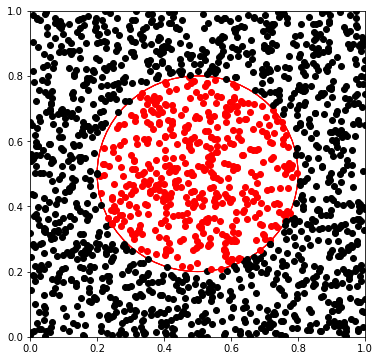

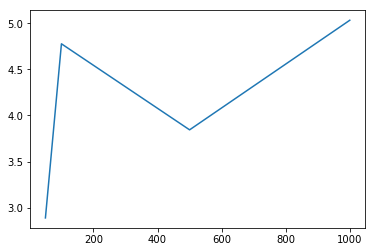

4.136111111111111


In [14]:
########################### Monte Carlo method #############################
x0 = y0 = 0.5
r = 0.5
S_sq = 1
S_cir_analyt = pi * r**2
S_cir_num = 0
numPis = []

def throwDot():
    return rnd.random(), rnd.random()

def dist(x1, y1, x2, y2):
    return sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def isInside(x, y):
    return True if ((x - x0)**2 + (y - y0)**2 <= r**2) else False


circle = plt.Circle((x0, y0), r, color='r', fill=False)
fig, ax = plt.subplots()
ax = plt.gca()
#ax.cla()

ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

throws = [50, 100, 500, 1000]
internalDots = 0

for num in throws:
    
    for i in range(num):
        x, y = throwDot()

        if(isInside(x, y)):
            internalDots +=1
            color = 'r'
        else: color = 'black'

        ax.plot(x, y, 'o', color=color)

    ax.add_artist(circle)
    #plt.show()
    #ax.cla()
    S_cir_num = S_sq * internalDots / num
    err = abs(S_cir_num - S_cir_analyt)
    
    numPi = S_cir_num / r**2
    numPis.append(numPi)
    
    print('Analytical area of circle = %.2f' % S_cir_analyt)
    print('Numerical area of circle = %.2f' % S_cir_num)
    print('Absolute error = %.2f' % err)
    print('Pi = %.4f\n' % numPi)


fig.set_figwidth(6)    
fig.set_figheight(6)
plt.show()

plt.plot(throws, numPis)
plt.show()

averageNumPi = sum(numPis) / len(numPis)
print(averageNumPi)